<a href="https://colab.research.google.com/github/rbondili/Tweet_Sentiment_Analysis/blob/master/Tweet_Sentiment_Part_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center><font size=5>Tweet Sentiment Extraction Kaggel Competition</font></h1>

### Table of contents

- [Data](#data)
- [ANN](#ann)
- [CNN](#cnn)
- [LSTM](#lstm)
- [Bidirectional LSTM ](#bilstm)
- [CNN LSTM](#cnnlstm)

### Data <a id="data"></a>

#### About Tweet Sentiment details

"My ridiculous dog is amazing." [sentiment: positive]

With all of the tweets circulating every second it is hard to tell whether the sentiment behind a specific tweet will impact a company, or a person's, brand for being viral (positive), or devastate profit because it strikes a negative tone. Capturing sentiment in language is important in these times where decisions and reactions are created and updated in seconds. But, which words actually lead to the sentiment description? In this competition you will need to pick out the part of the tweet (word or phrase) that reflects the sentiment.

Help build your skills in this important area with this broad dataset of tweets. Work on your technique to grab a top spot in this competition. What words in tweets support a positive, negative, or neutral sentiment? How can you help make that determination using machine learning tools?

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Load IMDB dataset

&#x270d; Load IMDB moview reviews dataset in keras with having the top 5,000 most common words.

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd /content/drive/My\ Drive/Colab\ Notebooks/TweetSentiment/

/content/drive/My Drive/Colab Notebooks/TweetSentiment


In [0]:
ls

 sample_submission.csv   train.csv
 test.csv               'Tweet Sentiment Extraction.ipynb'


## Loading the Dataset

In [0]:
relative_path = '/content/drive/My Drive/Colab Notebooks/TweetSentiment/'

train = pd.read_csv(relative_path + 'train.csv')
test = pd.read_csv(relative_path + 'test.csv')

print(train.head())
print(test.head())

       textID  ... sentiment
0  cb774db0d1  ...   neutral
1  549e992a42  ...  negative
2  088c60f138  ...  negative
3  9642c003ef  ...  negative
4  358bd9e861  ...  negative

[5 rows x 4 columns]
       textID                                               text sentiment
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative
3  01082688c6                                        happy bday!  positive
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive


In [0]:
X_train = train.drop('sentiment', axis=1)
y_train = train.sentiment
X_test = test.drop('sentiment', axis=1)
y_test = test.sentiment

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(27481, 3) (27481,) (3534, 2) (3534,)


In [0]:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

import string
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
# Add or remove any additional stopwords
stopwords_list.extend(['the'])
#stopwords_list.remove('no')
#stopwords_list.remove('not')

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
def clean_text(text):
   
    # Convert text to all lowercase letters
    text = text.lower()
    
    # Remove whitespaces
    text = text.strip()
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove all tokens that are not alphabetic   r[A-Za-z#]
    tokens = [token for token in tokens if token.isalpha()]
        
    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwords_list]
    
    # Remove tokens less than three letters
    tokens = [token for token in tokens if len(token) > 2 ]
    
    # Remove punctuations
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Lemmetize tokens
    tokens = [ lemmatizer.lemmatize(token) for token in tokens ]
    
    # Stem tokens
    #tokens = 
    
    # Re-create text from filtered tokens, so that vectorizer won't complain
    text = ' '.join(tokens)
    return text

In [0]:
X_train.selected_text[0]

'I`d have responded, if I were going'

In [0]:
clean_text(X_train.text[0])

'responded going'

In [0]:
 X_train.text =  X_train.text.astype(str)
 X_test.text =  X_test.text.astype(str)

In [0]:
X_train_clean = X_train.text.apply(lambda x: clean_text(x))
X_test_clean = X_test.text.apply(lambda x: clean_text(x))

In [0]:
print(len(X_train), len(X_test), len(X_train_clean), len(X_test_clean))

27481 3534 27481 3534


In [0]:
X_train_clean[:5]

0                   responded going
1           sooo sad miss san diego
2                      bos bullying
3             interview leave alone
4    son put release already bought
Name: text, dtype: object

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 350, oov_token = '<OOV>') 
tokenizer.fit_on_texts(X_train_clean)
X_train_seq = tokenizer.texts_to_sequences(X_train_clean)
X_test_seq = tokenizer.texts_to_sequences(X_test_clean)

In [0]:
from keras.preprocessing.sequence import pad_sequences

max_length = 350 

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding='post', truncating='post')

print('X_train_pad shape:', X_train_pad.shape) # (n_samples, sequence_length)
print('X_test_pad shape:', X_test_pad.shape)

Using TensorFlow backend.


X_train_pad shape: (27481, 350)
X_test_pad shape: (3534, 350)


In [0]:
from sklearn.preprocessing import LabelEncoder
out_encoder = LabelEncoder()
out_encoder.fit(y_train)
y_train_pad = out_encoder.transform(y_train)
y_test_pad = out_encoder.transform(y_test)

print(out_encoder.classes_)
print('y_train_pad shape:', y_train_pad.shape) # (n_samples, sequence_length)
print('y_test_pad shape:', y_test_pad.shape)

['negative' 'neutral' 'positive']
y_train_pad shape: (27481,)
y_test_pad shape: (3534,)


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_model(history):
    loss_train = history.history['loss']
    loss_vald = history.history['val_loss']

    acc_train = history.history['accuracy']
    acc_vald = history.history['val_accuracy']

    epochs = range(1, len(loss_train)+1)

    plt.figure(figsize=(10, 5))
    plt.subplot(1,2,1)
    plt.plot(epochs, loss_train,'r')
    plt.plot(epochs, loss_vald,'b')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='best')

    plt.subplot(1,2,2)
    plt.plot(epochs, acc_train,'r')
    plt.plot(epochs, acc_vald,'b')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc='best')
    plt.show()
    

###  ANN <a id="ann"></a>

&#x270d; Create the model.

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

embedding_dim = 16
vocab_size = 350

model = Sequential()

model.add(Embedding(vocab_size, embedding_dim, input_length= max_length))
model.add(Flatten())

model.add(Dense(350, activation='relu'))

model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 350, 16)           5600      
_________________________________________________________________
flatten_1 (Flatten)          (None, 5600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 350)               1960350   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1053      
Total params: 1,967,003
Trainable params: 1,967,003
Non-trainable params: 0
_________________________________________________________________


&#x270d; Compile and train the model. Consider 10% of training set for validation purpose.

In [0]:
from keras.optimizers import adam
model.compile(loss= 'sparse_categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'] )

batch_size = 32
epochs = 50

history = model.fit(X_train_pad, y_train_pad, epochs=epochs, batch_size=batch_size, validation_split=0.10)  

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 24732 samples, validate on 2749 samples
Epoch 1/50
24732/24732 [==============================] - 4s 161us/step - loss: 0.8957 - accuracy: 0.5814 - val_loss: 0.8098 - val_accuracy: 0.6479
Epoch 2/50
24732/24732 [==============================] - 2s 92us/step - loss: 0.7850 - accuracy: 0.6660 - val_loss: 0.8017 - val_accuracy: 0.6595
Epoch 3/50
24732/24732 [==============================] - 2s 92us/step - loss: 0.7683 - accuracy: 0.6732 - val_loss: 0.7897 - val_accuracy: 0.6591
Epoch 4/50
24732/24732 [==============================] - 2s 91us/step - loss: 0.7520 - accuracy: 0.6798 - val_loss: 0.8138 - val_accuracy: 0.6260
Epoch 5/50
24732/24732 [==============================] - 2s 92us/step - loss: 0.7348 - accuracy: 0.6876 - val_loss: 0.8041 - val_accuracy: 0.6653
Epoch 6/50
24732/24732 [==============================] - 2s 93us/step - loss: 0.7196 - accuracy: 0.6950 - val_loss: 0.8119 - val_accuracy: 0.6541
Epoch 7/50
24732/24732 [==============================] - 2s 95us/st

&#x270d; Evaluate the model over test set.

In [0]:
score, acc = model.evaluate(X_test_pad, y_test_pad)
print('Test score:', score)
print('Test accuracy:', acc)

3534/3534 [==============================] - 0s 43us/step
Test score: 3.457598449283896
Test accuracy: 0.583757758140564


&#x270d; Plot loss and accuracy metrics versus training epochs for both training and validation sets.

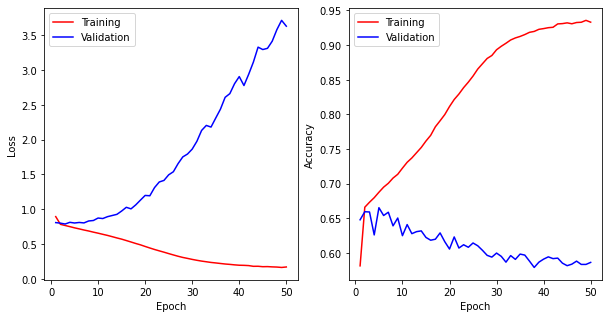

In [0]:
plot_model(history)

###  CNN <a id="cnn"></a>

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense

embedding_dim = 32
vocab_size = 350

model = Sequential()

model.add(Embedding(vocab_size, embedding_dim, input_length= max_length))
model.add(Dropout(0.2))

model.add(Conv1D(filters = 128, kernel_size = 5, strides= 1, padding='same', activation= 'relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(units= 256, activation= 'relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 350, 32)           11200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 350, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 350, 128)          20608     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                

In [0]:
from keras.optimizers import adam
model.compile(loss= 'sparse_categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'] )

batch_size = 32
epochs = 30

history = model.fit(X_train_pad, y_train_pad, epochs=epochs, batch_size=batch_size, validation_split=0.10)  

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 24732 samples, validate on 2749 samples
Epoch 1/30
24732/24732 [==============================] - 7s 301us/step - loss: 0.8644 - accuracy: 0.6080 - val_loss: 0.7926 - val_accuracy: 0.6708
Epoch 2/30
24732/24732 [==============================] - 3s 118us/step - loss: 0.7785 - accuracy: 0.6695 - val_loss: 0.7869 - val_accuracy: 0.6653
Epoch 3/30
24732/24732 [==============================] - 3s 118us/step - loss: 0.7614 - accuracy: 0.6772 - val_loss: 0.7812 - val_accuracy: 0.6635
Epoch 4/30
24732/24732 [==============================] - 3s 120us/step - loss: 0.7480 - accuracy: 0.6807 - val_loss: 0.7869 - val_accuracy: 0.6610
Epoch 5/30
24732/24732 [==============================] - 3s 120us/step - loss: 0.7343 - accuracy: 0.6859 - val_loss: 0.7810 - val_accuracy: 0.6650
Epoch 6/30
24732/24732 [==============================] - 3s 119us/step - loss: 0.7217 - accuracy: 0.6907 - val_loss: 0.7946 - val_accuracy: 0.6635
Epoch 7/30
24732/24732 [==============================] - 3s 11

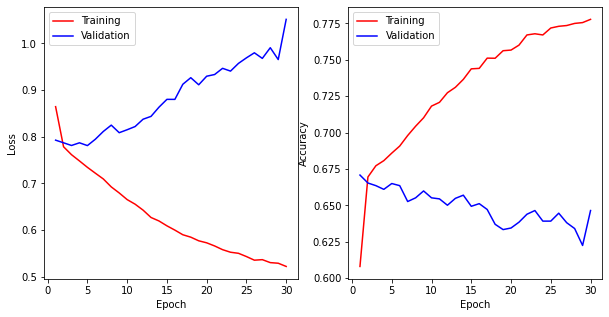

In [0]:
plot_model(history)

In [0]:
score, acc = model.evaluate(X_test_pad, y_test_pad)
print('Test score:', score)
print('Test accuracy:', acc)

3534/3534 [==============================] - 0s 47us/step
Test score: 1.0088342548631044
Test accuracy: 0.6389360427856445


###  LSTM <a id="lstm"></a>

In [0]:
from keras.layers import LSTM

embedding_dim = 32
vocab_size = 350

model = Sequential()

model.add(Embedding(vocab_size, embedding_dim, input_length= max_length))

model.add(LSTM(128, dropout= 0.2, recurrent_dropout= 0.2))

model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 350, 32)           11200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               82432     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 387       
Total params: 94,019
Trainable params: 94,019
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.optimizers import adam
model.compile(loss= 'sparse_categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'] )

batch_size = 32
epochs = 10

history = model.fit(X_train_pad, y_train_pad, epochs=epochs, batch_size=batch_size, validation_split=0.10)  

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 24732 samples, validate on 2749 samples
Epoch 1/10
24732/24732 [==============================] - 426s 17ms/step - loss: 1.0885 - accuracy: 0.4022 - val_loss: 1.0816 - val_accuracy: 0.4249
Epoch 2/10
24732/24732 [==============================] - 424s 17ms/step - loss: 1.0879 - accuracy: 0.4023 - val_loss: 1.0872 - val_accuracy: 0.4249
Epoch 3/10
24732/24732 [==============================] - 422s 17ms/step - loss: 1.0879 - accuracy: 0.4023 - val_loss: 1.0829 - val_accuracy: 0.4249
Epoch 4/10
24732/24732 [==============================] - 422s 17ms/step - loss: 1.0879 - accuracy: 0.4023 - val_loss: 1.0819 - val_accuracy: 0.4249
Epoch 5/10
24732/24732 [==============================] - 425s 17ms/step - loss: 1.0882 - accuracy: 0.4019 - val_loss: 1.0809 - val_accuracy: 0.4249
Epoch 6/10
24732/24732 [==============================] - 423s 17ms/step - loss: 1.0875 - accuracy: 0.4023 - val_loss: 1.0813 - val_accuracy: 0.4249
Epoch 7/10
24732/24732 [==============================] -

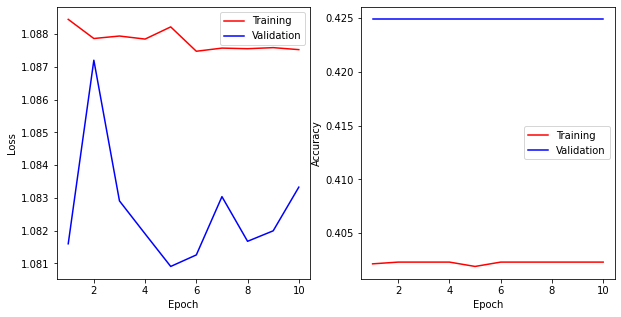

In [0]:
plot_model(history)

In [0]:
score, acc = model.evaluate(X_test_pad, y_test_pad)
print('Test score:', score)
print('Test accuracy:', acc)

3534/3534 [==============================] - 6s 2ms/step
Test score: 1.0870345914573
Test accuracy: 0.40464064478874207


### Bidirectional LSTM <a name="bilstm"></a>

In [0]:
from keras.layers import Bidirectional   #(X,A)*W  Number*4

embedding_dim = 32
vocab_size = 350

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length= max_length))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 350, 32)           11200     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               49664     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 387       
Total params: 61,251
Trainable params: 61,251
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras.optimizers import adam
model.compile(loss= 'sparse_categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'] )

batch_size = 32
epochs = 10

history = model.fit(X_train_pad, y_train_pad, epochs=epochs, batch_size=batch_size, validation_split=0.10)  

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 24732 samples, validate on 2749 samples
Epoch 1/10
24732/24732 [==============================] - 709s 29ms/step - loss: 0.8907 - accuracy: 0.5877 - val_loss: 0.8055 - val_accuracy: 0.6548
Epoch 2/10
24732/24732 [==============================] - 689s 28ms/step - loss: 0.7908 - accuracy: 0.6635 - val_loss: 0.7852 - val_accuracy: 0.6584
Epoch 3/10
24732/24732 [==============================] - 686s 28ms/step - loss: 0.7801 - accuracy: 0.6669 - val_loss: 0.7809 - val_accuracy: 0.6606
Epoch 4/10
24732/24732 [==============================] - 687s 28ms/step - loss: 0.7741 - accuracy: 0.6689 - val_loss: 0.7774 - val_accuracy: 0.6672
Epoch 5/10
24732/24732 [==============================] - 688s 28ms/step - loss: 0.7669 - accuracy: 0.6731 - val_loss: 0.7747 - val_accuracy: 0.6693
Epoch 6/10
24732/24732 [==============================] - 693s 28ms/step - loss: 0.7635 - accuracy: 0.6734 - val_loss: 0.7713 - val_accuracy: 0.6697
Epoch 7/10
24732/24732 [==============================] -

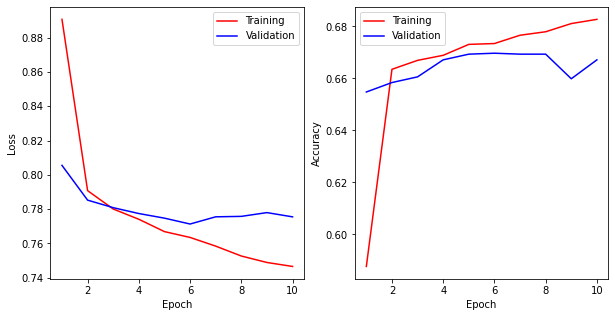

In [0]:
plot_model(history)

In [0]:
score, acc = model.evaluate(X_test_pad, y_test_pad)
print('Test score:', score)
print('Test accuracy:', acc)

3534/3534 [==============================] - 10s 3ms/step
Test score: 0.7579922645390202
Test accuracy: 0.6683644652366638


### CNN LSTM <a name="cnnlstm"></a>

In [0]:
from keras.layers import MaxPooling1D, Activation

embedding_dim = 32
vocab_size = 350

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length= max_length))
model.add(Dropout(0.25))
model.add(Conv1D(filters = 64, kernel_size= 5, padding='valid', activation='relu', strides=1))
model.add(MaxPooling1D(pool_size= 4))
model.add(LSTM(70))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 350, 32)           11200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 350, 32)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 346, 64)           10304     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 86, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 70)                37800     
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 213       
Total params: 59,517
Trainable params: 59,517
Non-trainable params: 0
__________________________________________________

In [0]:
from keras.optimizers import adam
model.compile(loss= 'sparse_categorical_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy'] )

batch_size = 32
epochs = 10

history = model.fit(X_train_pad, y_train_pad, epochs=epochs, batch_size=batch_size, validation_split=0.10)  

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 24732 samples, validate on 2749 samples
Epoch 1/10
24732/24732 [==============================] - 153s 6ms/step - loss: 1.0884 - accuracy: 0.4020 - val_loss: 1.0816 - val_accuracy: 0.4249
Epoch 2/10
24732/24732 [==============================] - 146s 6ms/step - loss: 1.0878 - accuracy: 0.4023 - val_loss: 1.0822 - val_accuracy: 0.4249
Epoch 3/10
24732/24732 [==============================] - 146s 6ms/step - loss: 1.0875 - accuracy: 0.4023 - val_loss: 1.0839 - val_accuracy: 0.4249
Epoch 4/10
24732/24732 [==============================] - 145s 6ms/step - loss: 1.0877 - accuracy: 0.4023 - val_loss: 1.0827 - val_accuracy: 0.4249
Epoch 5/10
24732/24732 [==============================] - 145s 6ms/step - loss: 1.0876 - accuracy: 0.4023 - val_loss: 1.0829 - val_accuracy: 0.4249
Epoch 6/10
24732/24732 [==============================] - 144s 6ms/step - loss: 1.0876 - accuracy: 0.4023 - val_loss: 1.0832 - val_accuracy: 0.4249
Epoch 7/10
24732/24732 [==============================] - 144s 

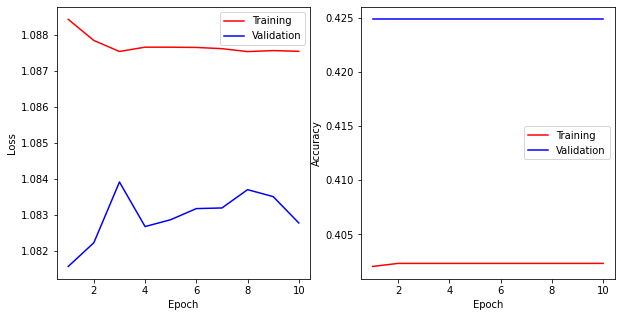

In [0]:
plot_model(history)

In [0]:
score, acc = model.evaluate(X_test_pad, y_test_pad)
print('Test score:', score)
print('Test accuracy:', acc)

3534/3534 [==============================] - 2s 514us/step
Test score: 1.0869010694295456
Test accuracy: 0.40464064478874207


### Reference <a name="ref"></a>

https://keras.io/examples/imdb_cnn/